In [1]:
import ray
import numpy as np

from markets.realistic import RayMarketScenario, MarketMaker, USITMarket, ChartInvestor
from markets.realistic import INTRINSIC_VALUE, BiasedMarketView
from markets.realistic.Clock import Clock

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

------------------------------------------------------

In [3]:
def plot_order_book(market_maker):
    type_for = {'a': 'ask', 'b': 'bid'}
    order_book = market_maker.get_order_book()
    orders = order_book['TSMC']
    orders = {'price': [k for k in orders], 'amount': [v[0] for v in orders.values()],
              'order_type': [type_for[v[1]] for v in orders.values()]}
    orders = pd.DataFrame.from_dict(orders)

    plt.figure(figsize=(16, 6))
    sns.scatterplot(data=orders, x='price', y='amount', hue=orders["order_type"].to_list())

------------------------------------------------------

In [4]:
ray.init()
np.random.seed(17)
clock = Clock(n_seconds=60, n_minutes=60, n_hours=24, n_days=256)
# sc = SynchronousMarketScenario(clock)
sc = RayMarketScenario(clock)

------------------------------------------------------

In [5]:
market = USITMarket({'TSMC': 186.73, 'AAPL': 201.22, 'TSLA': 462.4},noise=0.0)
mm = MarketMaker(market)
market_makers = sc.register_market_makers(mm)

In [6]:
mm = market_makers[0]
mm.osid()

'10961 - 19663224112'

------------------------------------------------------

In [7]:
noise = .05
biases = {INTRINSIC_VALUE: lambda v: 0.96 * v}
biased_market_view = BiasedMarketView(market, biases)
warren = ChartInvestor(market=biased_market_view,
                       name='Warren Buffet',
                       portfolio={'TSMC': 5000},
                       cash=200_000)

# Michael has a bias as to overestimate the intrinsic value (OK, I know he wouldn't - ever!)
biases = {INTRINSIC_VALUE: lambda v: 1.04 * v}
#biases = {INTRINSIC_VALUE: lambda v: np.random.normal(1.03 * v, v * noise)}
biased_market_view = BiasedMarketView(market, biases)
michael = ChartInvestor(market=biased_market_view,
                        name='Michael Burry',
                        portfolio={'TSMC': 5000},
                        cash=200_000)

In [8]:
investors = sc.register_investors(warren, michael)

-----------------------------------------------------

In [9]:
warren, michael = investors
warren.osid(), michael.osid()

('10963 - 19670528304', '10959 - 4713947536')

In [10]:
mm.get_prices()

{'TSMC': {'bid': None, 'ask': None, 'last': 188.60194476307495},
 'AAPL': {'bid': None, 'ask': None, 'last': 203.2372051905208},
 'TSLA': {'bid': None, 'ask': None, 'last': 467.0355018392645}}

------------------------------------------------------

In [11]:
sc.tick(seconds=10)
# TODO: Introduce simple Momentum Investors
# TODO: Investors may create market orders (Retail)
# TODO: Introduce node- and stock-specific market makers
# TODO: Handle order expiry at market maker and investor side
# TODO: Introduce stop loss strategy for investors
# TODO: Introduce central logging (return values from 'tick')
# TODO: Introduce reporting from the market maker

In [12]:
mm.get_prices()

{'TSMC': {'bid': None, 'ask': None, 'last': 188.60194476307495},
 'AAPL': {'bid': None, 'ask': None, 'last': 203.2372051905208},
 'TSLA': {'bid': None, 'ask': None, 'last': 467.0355018392645}}

In [13]:
michael.get_portfolio()

{'TSMC': 5017.158273381295, 'CASH': 196807.18848920864}

In [14]:
warren.get_portfolio()

{'TSMC': 4948.525179856116, 'CASH': 209626.4776978417}

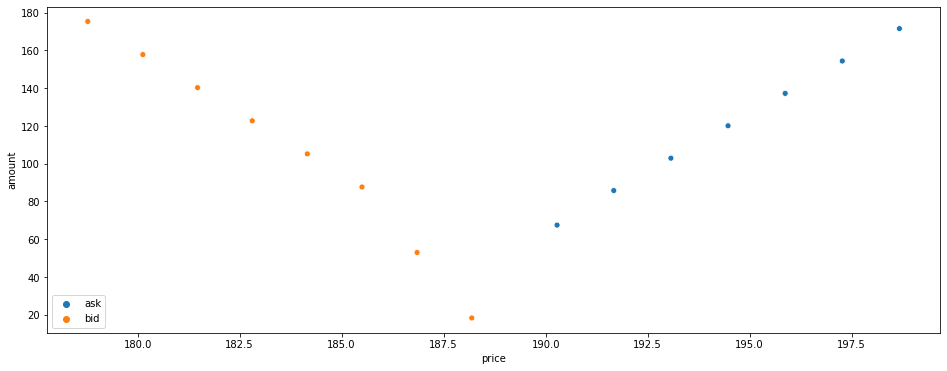

In [15]:
plot_order_book(mm)

------------------------------------------------------
------------------------------------------------------

In [16]:
from markets.realistic import Order, OrderType, ExecutionType
order = Order(michael.get_qname(), OrderType.ASK,
              ExecutionType.MARKET, 'TSMC', 500, 0, 0)
print(order)
mm.submit_orders([order])

ask market for 500 shares of TSMC


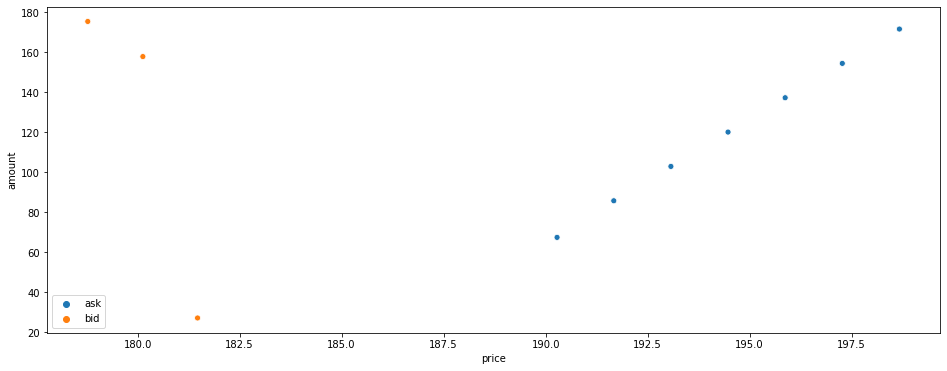

In [17]:
plot_order_book(mm)

In [18]:
mm.get_prices()

{'TSMC': {'bid': 181.47, 'ask': 190.28, 'last': 181.47},
 'AAPL': {'bid': None, 'ask': None, 'last': 203.2372051905208},
 'TSLA': {'bid': None, 'ask': None, 'last': 467.0355018392645}}

In [19]:
#ray.shutdown()

In [20]:
#[market.get_intrinsic_value('TSMC', day) for day in range(100)]

In [ ]:
#[market.get_intrinsic_value('TSMC', day) for day in range(100)]